In [1]:
import matplotlib.pyplot as plt

In [14]:
from collections import namedtuple
import pandas as pd
#pd.style.set_properties(subset=['ad_description'], **{'width-min': '300px'})


fnames = []
KW = ['D', 'X', 'R', 'S', 'M', 'N', 'L', 'i']
Key = namedtuple('Key', KW)
keys = []
datasets = ['cifarfs',  'fc100', 'miniimagenet']# 'miniimagenet84',]# 'tieredimagenet']
for i in [0]:
    for D in datasets:
        for M in ['']:
            for R in [0.0]:
                for N in [0.0, 0.2, 0.4]:
                    for X in [0]:
                        for S in ['00.0']:
                            for NT in [N]:
                                for L in ['0.000001', '0.000002', '0.000004', '0.000008']:
                                    fnames.append(f'features.{D}{M}_{R}_n{N}_x{X}_s{S}_l{L}.pt55.lam1000.0_nt{NT}.csv')
                                    keys.append(Key(D=D, X=X, R=R, S=float(S), M=M, N=N, L=float(L), i=i))
        

In [15]:
recs = []
shots = [5]
mets = [
'test_acc', 
# 'test_acc_me1', 
# 'test_acc_me2',
# 'test_acc_me3',
# 'test_acc_me4',
# 'test_acc_me5',
# 'test_acc_me6',
# 'test_acc_me7',
# 'test_acc_me8',
# 'test_acc_me9',
 'test_acc_med',
]

metrics = set()
for key, fname in zip(keys, fnames):
    #print(key)
    rec = {}
    cdf = pd.read_csv(f'/home/ubuntu/checkpoints/{fname}')
    #print(cdf.columns)
    #rec['test_acc_80'] = cdf[cdf.shots==80].test_acc*100
    for m in mets:
        for s in shots:
            metric = f'{m}_{s}' 
            rec[metric] = float(cdf[cdf.shots==s].__getattr__(m)*100)
            metrics.add(metric)  
    for k in KW +['i']:
        rec[k] = key.__getattribute__(k)
    recs.append(rec)
metrics = sorted(list(metrics))
#metrics = ['test_acc_5', 'test_acc_80', 'test_acc_lin_5', 'test_acc_lin_80']






In [16]:
df = pd.DataFrame(recs)
df = df.groupby(KW).mean().reset_index()

df.to_markdown()

'|    | D            |   X |   R |   S | M   |   N |     L |   i |   test_acc_5 |   test_acc_med_5 |\n|---:|:-------------|----:|----:|----:|:----|----:|------:|----:|-------------:|-----------------:|\n|  0 | cifarfs      |   0 |   0 |   0 |     | 0   | 1e-06 |   0 |      82.6467 |          74.1347 |\n|  1 | cifarfs      |   0 |   0 |   0 |     | 0   | 2e-06 |   0 |      81.904  |          73.1907 |\n|  2 | cifarfs      |   0 |   0 |   0 |     | 0   | 4e-06 |   0 |      82.5814 |          73.832  |\n|  3 | cifarfs      |   0 |   0 |   0 |     | 0   | 8e-06 |   0 |      82.5907 |          73.9147 |\n|  4 | cifarfs      |   0 |   0 |   0 |     | 0.2 | 1e-06 |   0 |      70.88   |          62.3693 |\n|  5 | cifarfs      |   0 |   0 |   0 |     | 0.2 | 2e-06 |   0 |      71.952  |          63.5733 |\n|  6 | cifarfs      |   0 |   0 |   0 |     | 0.2 | 4e-06 |   0 |      71.464  |          63.0813 |\n|  7 | cifarfs      |   0 |   0 |   0 |     | 0.2 | 8e-06 |   0 |      71.0093 |          

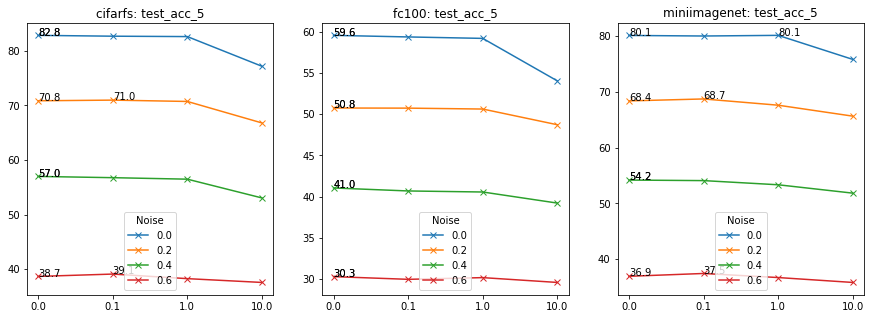

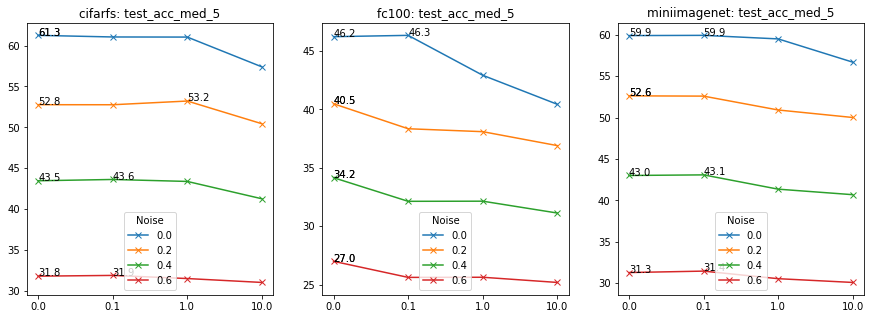

In [5]:
import warnings
warnings.filterwarnings("ignore")

for metric in metrics:
    plt.figure(figsize=(5*len(df.D.unique()),5))
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N in  sorted(df.N.unique()):
            cdf = df[df.D==D][df.R==0][df.M==''][df.N==N].sort_values('S')
            vals = cdf[metric].astype(float)
            plt.plot(range(len(cdf.S)), vals, '-x', label=N)
            x = vals.argmax()
            y = vals.max()
            plt.text(vals.argmax(), vals.max(), f'{vals.max():.1f}')
            plt.text(0, vals.iloc[0], f'{vals.iloc[0]:.1f}')

            #print(f'{N=}')
            #print(df[df.R==0][df.M==''][df.N==N].to_markdown())
            #print()

        plt.legend(title='Noise')
        plt.xticks(range(len(cdf.S)),cdf.S)
        plt.title(f'{D}: {metric}') 
    plt.show()

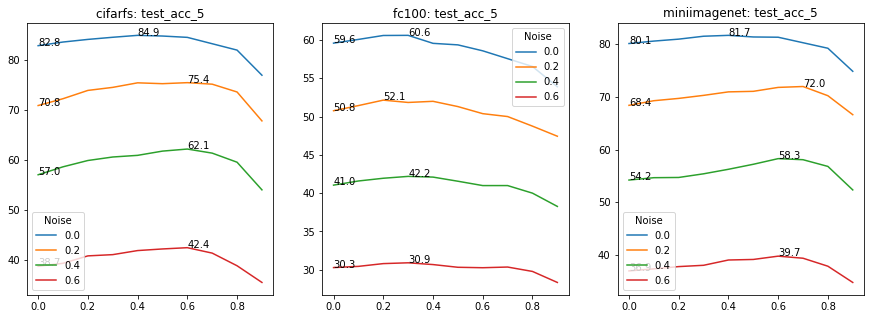

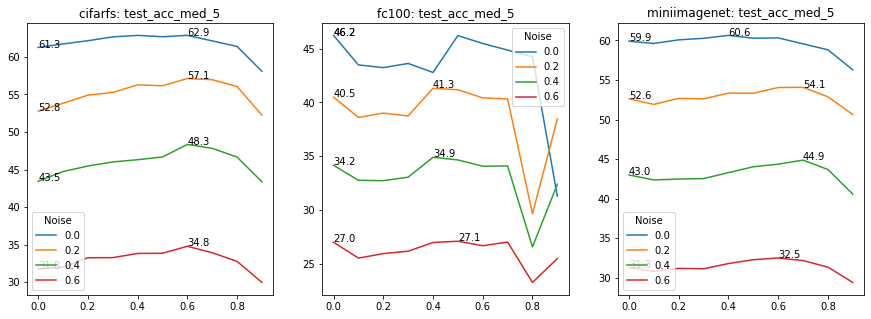

In [6]:
for metric in metrics:
    plt.figure(figsize=(5*len(df.D.unique()),5))
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N in  sorted(df.N.unique()):
            cdf = df[df.D==D][df.M==''][df.S==0.0][df.N==N].sort_values('R')
            vals = cdf[metric].astype(float)
            plt.plot(cdf.R, vals, label=N)
            #print(f'{N=}')
            #print(df[df.M==''][df.S==0.0][df.N==N].to_markdown())
            #print()
            plt.text(cdf.R.iloc[vals.argmax()], vals.max(), f'{vals.max():.1f}')
            plt.text(cdf.R.iloc[0], vals.iloc[0], f'{vals.iloc[0]:.1f}')


        plt.legend(title='Noise')
        plt.title(f'{D}: {metric}') 
    plt.show()

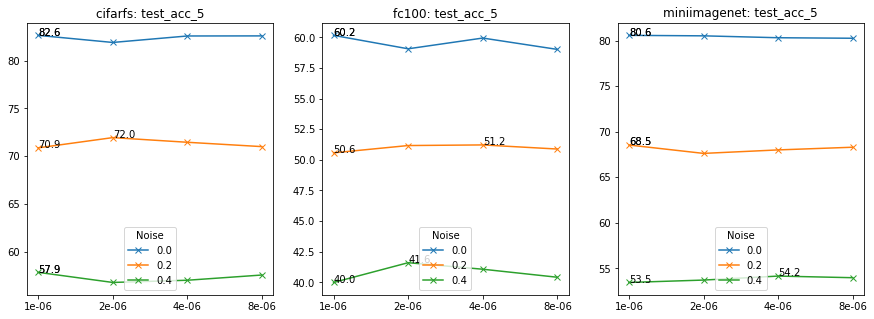

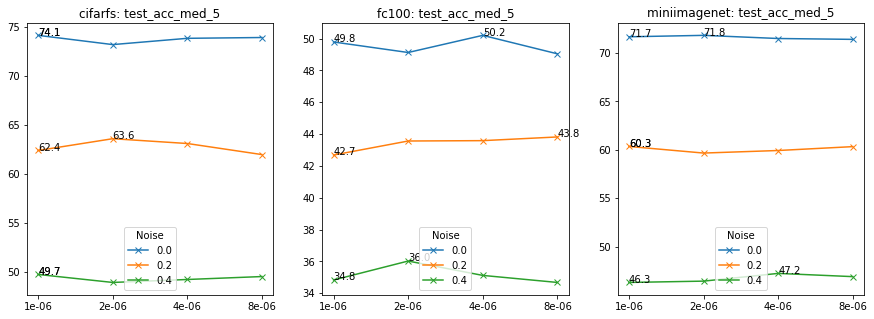

In [18]:
import warnings
warnings.filterwarnings("ignore")

for metric in metrics:
    plt.figure(figsize=(5*len(df.D.unique()),5))
    for i,D in enumerate(df.D.unique()):
        plt.subplot(1, len(df.D.unique()), i+1)
        for N in  sorted(df.N.unique()):
            cdf = df[df.D==D][df.R==0][df.M==''][df.N==N][df.S==0].sort_values('L')
            vals = cdf[metric].astype(float)
            plt.plot(range(len(cdf.L)), vals, '-x', label=N)
            x = vals.argmax()
            y = vals.max()
            plt.text(vals.argmax(), vals.max(), f'{vals.max():.1f}')
            plt.text(0, vals.iloc[0], f'{vals.iloc[0]:.1f}')

            #print(f'{N=}')
            #print(df[df.R==0][df.M==''][df.N==N].to_markdown())
            #print()

        plt.legend(title='Noise')
        plt.xticks(range(len(cdf.L)),cdf.L)
        plt.title(f'{D}: {metric}') 
    plt.show()